In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model=VGG16()

In [ ]:
x=tf.Variable(3.0)
with tf.GradientTape() as tape:
  tape.watch(x)
  y=3*x**2+2

tape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

In [ ]:
outputs=[]
for layer in model.layers:
  outputs.append(layer.output)

outputs

[<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>,
 <KerasTensor shape=(None, 224, 224, 64), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 224, 224, 64), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 112, 112, 64), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 112, 112, 128), dtype=float32, sparse=False, name=keras_tensor_4>,
 <KerasTensor shape=(None, 112, 112, 128), dtype=float32, sparse=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 56, 56, 128), dtype=float32, sparse=False, name=keras_tensor_6>,
 <KerasTensor shape=(None, 56, 56, 256), dtype=float32, sparse=False, name=keras_tensor_7>,
 <KerasTensor shape=(None, 56, 56, 256), dtype=float32, sparse=False, name=keras_tensor_8>,
 <KerasTensor shape=(None, 56, 56, 256), dtype=float32, sparse=False, name=keras_tensor_9>,
 <KerasTensor shape=(None, 28, 28, 256), dtype=float32, sparse=False, name=

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


[<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.25298488, 0.46589887, 0.48121762],
          [0.6593952 , 0.9262377 , 0.64843583],
          [0.948611  , 0.5302578 , 0.34046376],
          ...,
          [0.75162685, 0.59557533, 0.28472674],
          [0.842     , 0.8556936 , 0.57213175],
          [0.9699367 , 0.25886595, 0.8277509 ]],
 
         [[0.53251016, 0.4297787 , 0.30454397],
          [0.39034414, 0.30472016, 0.23733139],
          [0.24435651, 0.9810953 , 0.7445837 ],
          ...,
          [0.14979649, 0.09160864, 0.19890761],
          [0.6728132 , 0.08443189, 0.84584427],
          [0.21696854, 0.73291194, 0.52456534]],
 
         [[0.6196593 , 0.5301186 , 0.22949755],
          [0.9067664 , 0.60215795, 0.99806535],
          [0.9527998 , 0.02226663, 0.25891352],
          ...,
          [0.13508844, 0.21287   , 0.14770496],
          [0.81091833, 0.7327162 , 0.73822594],
          [0.90431595, 0.7770885 , 0.11779368]],
 
         ...,
 
       

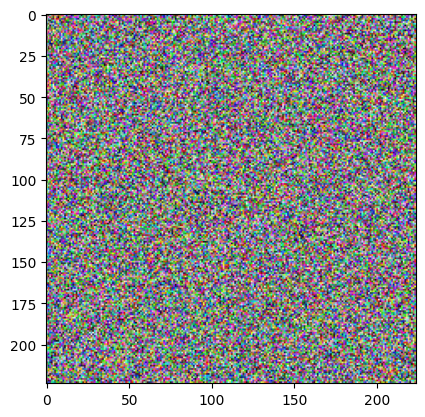

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


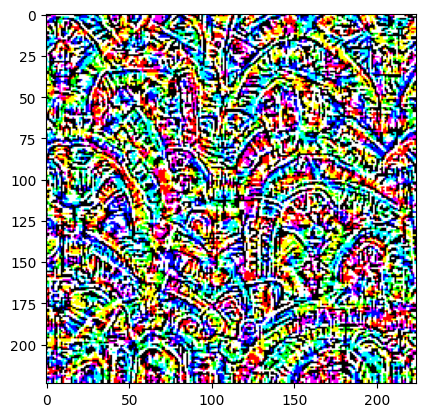

In [ ]:
visual=models.Model(inputs=model.inputs, outputs=outputs)
image=tf.random.normal((1,224,224,3))
plt.imshow(image[0])
visual(image)

for i in range (10):
  with tf.GradientTape() as tape:
    tape.watch(image)
    output=visual(image)[17][:,:,:,359]
    output=tf.reduce_sum(output)

  grads=tape.gradient(output,image)
  image=image+grads*100
plt.imshow(image[0])

In [ ]:
img_path = 'WechatIMG116.jpeg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

ret = visual(x)
out = tf.reduce_sum(tf.reshape(ret[17], (-1, 512)), axis=0)
np.argsort(out)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


array([483, 487, 488, 491,  71,  70, 474, 470,  41, 503, 475, 476,  43,
        44,  47,  46,  53,  51, 494, 509, 506, 508, 133, 132, 134, 361,
       332, 331, 355, 354, 350, 347, 165,  90,  91,  95,  97, 107, 333,
        10, 112,  13,  15,  16, 135, 122, 116, 115, 167,  93,  92,  87,
        86, 302, 308, 305, 299, 301, 316, 312, 329, 170, 169, 168, 185,
       219, 220, 174, 403, 419, 424, 421, 405, 409, 425, 303,  54, 297,
       295, 294, 157, 160, 162, 164,  57,  58,  61, 153, 145, 147, 148,
       144, 141, 140, 137, 151, 221, 181, 178, 176, 180, 192, 190, 412,
       411, 426, 228, 326, 230, 212, 213, 203, 284, 283, 324, 286, 364,
       275, 291, 276, 287, 379, 376, 374, 389, 388, 224, 223,  78,  80,
        81, 495, 502, 501,  74,  77,  33,   4, 437, 436, 435, 434, 460,
       461,  83,  64,  65,  66,  18,  69, 210, 260, 270, 200, 193, 209,
       208, 207, 206, 205, 383, 384, 385, 387, 236, 239, 240, 242, 492,
       273, 255, 258, 232, 253, 251, 245,  27,  26, 457, 459, 44

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


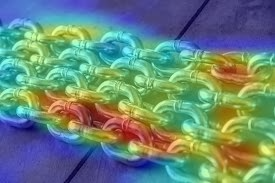

In [ ]:
grad_model = models.Model(inputs=model.inputs, outputs=[model.get_layer('block5_conv3').output, model.output])

with tf.GradientTape() as tape:
    layer_output, output = grad_model(x)
    idx = tf.argmax(output[0])
    target = output[:, idx]

grads = tape.gradient(target, layer_output)
weighted = layer_output @ tf.expand_dims(tf.reduce_mean(grads, (0, 1, 2)), axis=1)
heatmap = weighted[0] / tf.reduce_max(weighted[0])
heatmap = tf.squeeze(heatmap)
heatmap = tf.maximum(heatmap, 0)

# pooled_grads = tf.reduce_mean(grads, (0, 1, 2))
# heatmap = layer_output @ tf.expand_dims(pooled_grads, axis=1)
# heatmap = tf.squeeze(heatmap)
# heatmap = np.maximum(heatmap, 0)
# heatmap /= heatmap.max()
# plt.imshow(heatmap)

from matplotlib import colormaps

hm = np.uint8(255 * heatmap)
jet = colormaps["jet"]
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[hm]

img = image.load_img(img_path)
img = image.img_to_array(img)
hm = image.array_to_img(jet_heatmap).resize((img.shape[1], img.shape[0]))
ret = image.img_to_array(hm) + img
image.array_to_img(ret)